In [196]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

eth = yf.download("ETH-USD", start="2019-01-01", end="2025-08-30")
eth.head()
eth.info()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2433 entries, 2019-01-01 to 2025-08-29
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, ETH-USD)   2433 non-null   float64
 1   (High, ETH-USD)    2433 non-null   float64
 2   (Low, ETH-USD)     2433 non-null   float64
 3   (Open, ETH-USD)    2433 non-null   float64
 4   (Volume, ETH-USD)  2433 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 114.0 KB


In [197]:
eth.isna().sum()

Price   Ticker 
Close   ETH-USD    0
High    ETH-USD    0
Low     ETH-USD    0
Open    ETH-USD    0
Volume  ETH-USD    0
dtype: int64

In [198]:
close = eth["Close"]["ETH-USD"]
close = close.astype("float64")
print(close)

Date
2019-01-01     140.819412
2019-01-02     155.047684
2019-01-03     149.135010
2019-01-04     154.581940
2019-01-05     155.638596
                 ...     
2025-08-25    4372.987793
2025-08-26    4600.426758
2025-08-27    4503.393066
2025-08-28    4507.177734
2025-08-29    4360.152832
Name: ETH-USD, Length: 2433, dtype: float64


In [199]:
eth["Return"] = close.pct_change()

In [200]:
ret = eth["Return"]
print(ret)


Date
2019-01-01         NaN
2019-01-02    0.101039
2019-01-03   -0.038135
2019-01-04    0.036523
2019-01-05    0.006836
                ...   
2025-08-25   -0.085082
2025-08-26    0.052010
2025-08-27   -0.021092
2025-08-28    0.000840
2025-08-29   -0.032620
Name: Return, Length: 2433, dtype: float64


In [201]:
eth = eth[eth["Return"].notna()]
ret = eth["Return"]
print(ret)

Date
2019-01-02    0.101039
2019-01-03   -0.038135
2019-01-04    0.036523
2019-01-05    0.006836
2019-01-06    0.013542
                ...   
2025-08-25   -0.085082
2025-08-26    0.052010
2025-08-27   -0.021092
2025-08-28    0.000840
2025-08-29   -0.032620
Name: Return, Length: 2432, dtype: float64


In [202]:
summaryStats = {
    "start": ret.index.min().date(),
    "end": ret.index.max().date(),
    "num_days": ret.shape[0],
    "mean_daily": ret.mean(),
    "std_daily": ret.std(),
    "min_daily": ret.min(),
    "max_daily": ret.max(),
    "pct_up_days": (ret > 0).mean()
}
summaryStats

{'start': datetime.date(2019, 1, 2),
 'end': datetime.date(2025, 8, 29),
 'num_days': 2432,
 'mean_daily': 0.0023462358837038496,
 'std_daily': 0.04291366997625708,
 'min_daily': -0.42347221465293294,
 'max_daily': 0.2594753293956862,
 'pct_up_days': 0.5172697368421053}

In [203]:
#Annualised return with compounding, so buy and hold
annualised_return = ((1 + summaryStats["mean_daily"]))**365
annualised_return_pct = (annualised_return - 1) * 100
annualised_return_pct

135.22516915547374

In [204]:
#Annualised Volatility 
annualised_vol = summaryStats["std_daily"] * np.sqrt(365)
annualised_vol

0.8198645137175742

In [205]:
#Sharpe Ratio (risk-free assumed 0)
sharpe = annualised_return / annualised_vol
sharpe

2.869073672781303

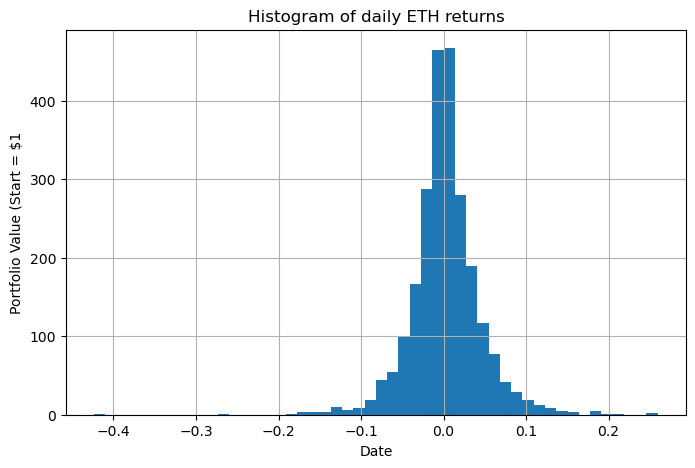

In [206]:
ret.hist(bins=50, figsize=(8,5))
plt.title("Histogram of daily ETH returns")
plt.ylabel("Portfolio Value (Start = $1")
plt.xlabel("Date")
plt.show()

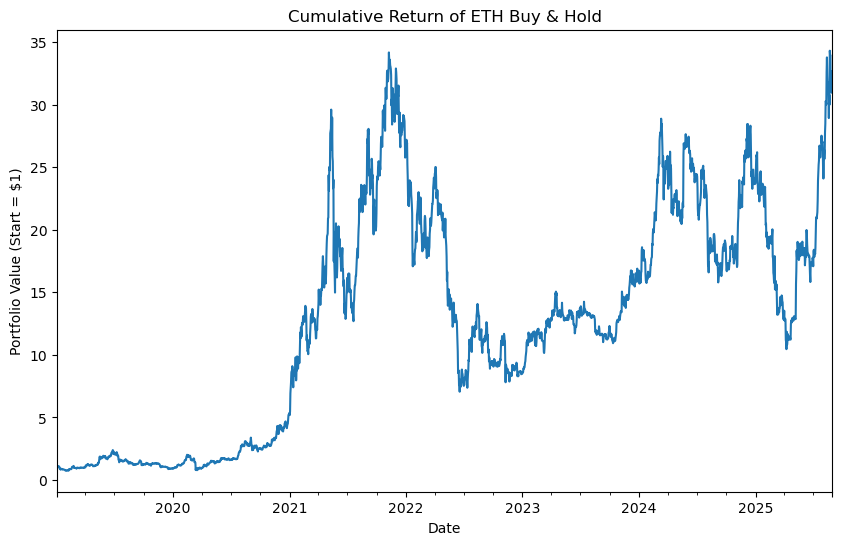

In [207]:
cumulative = (1 + ret).cumprod()

cumulative.plot(figsize=(10,6))
plt.title("Cumulative Return of ETH Buy & Hold")
plt.ylabel("Portfolio Value (Start = $1)")
plt.xlabel("Date")
plt.show()
